In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv('data/E.coli/phenotypic.csv',sep=',',encoding='utf-8')
data

,ENA.Accession.Number,Isolate,Lane.accession,Sequecning Status,Year,CTZ,CTX,AMP,AMX,AMC,TZP,CXM,CET,GEN,TBM,TMP,CIP
0,ERS356929,11657_5#10,ERR434268,Previously sequenced,2010.0,S,S,S,NaN,S,S,S,I,S,S,S,S
1,ERS356935,11657_5#11,ERR434269,Previously sequenced,2010.0,S,S,R,NaN,R,S,S,I,S,S,R,R
2,ERS356938,11657_5#12,ERR434270,Previously sequenced,2010.0,S,S,S,NaN,S,S,S,S,S,S,S,S
3,ERS356941,11657_5#13,ERR434271,Previously sequenced,2010.0,S,S,R,NaN,R,S,S,I,S,S,S,R
4,ERS356967,11657_5#14,ERR434272,Previously sequenced,2010.0,S,S,R,NaN,S,S,S,S,S,S,R,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,ERS1995066,24742_1#96,ERS1995066,Newly sequenced,NaN,S,S,S,NaN,NaN,NaN,S,S,S,S,S,S
1932,ERS1995067,24742_1#97,ERS1995067,Newly sequenced,NaN,S,S,S,NaN,NaN,NaN,S,S,S,R,S,S
1933,ERS1995068,24742_1#98,ERS1995068,Newly sequenced,NaN,S,S,R,NaN,NaN,NaN,S,S,S,S,S,S
1934,ERS1995069,24742_1#99,ERS1995069,Newly sequenced,NaN,S,S,R,NaN,NaN,NaN,S,S,S,S,S,S


In [15]:
Label_Distribution={drug:{} for drug in data.columns[5:]}
for drug in Label_Distribution.keys():
    labels=data[drug].dropna(axis=0, how='any').value_counts()
    Label_Distribution[drug]['nums']=int(labels['S']+labels['R'])
    Label_Distribution[drug]['S']=int(labels['S'])
    Label_Distribution[drug]['R']=int(labels['R'])
Label_Distribution['CTZ']

{'nums': 1858, 'S': 1593, 'R': 265}

In [16]:
import json
with open('data/E.coli/Label_Distribution.json','w',encoding='utf-8') as f:
    json.dump(Label_Distribution,f,ensure_ascii=False,indent=2)

<BarContainer object of 12 artists>

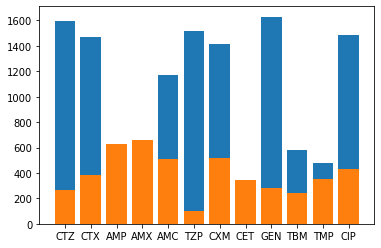

In [20]:
R=[Label_Distribution[drug]['R'] for drug in Label_Distribution.keys()]
S=[Label_Distribution[drug]['S'] for drug in Label_Distribution.keys()]
plt.bar(Label_Distribution.keys(),S)
plt.bar(Label_Distribution.keys(),R)

In [4]:
print(data.columns[5:].tolist())

['CTZ', 'CTX', 'AMP', 'AMX', 'AMC', 'TZP', 'CXM', 'CET', 'GEN', 'TBM', 'TMP', 'CIP']
